[94 82 38  5 35 96 65 66 37 18 61 48 92 40 84 14 12  6 73 85 89  8 23 30
 77 60 69 20 50 67 80 16]


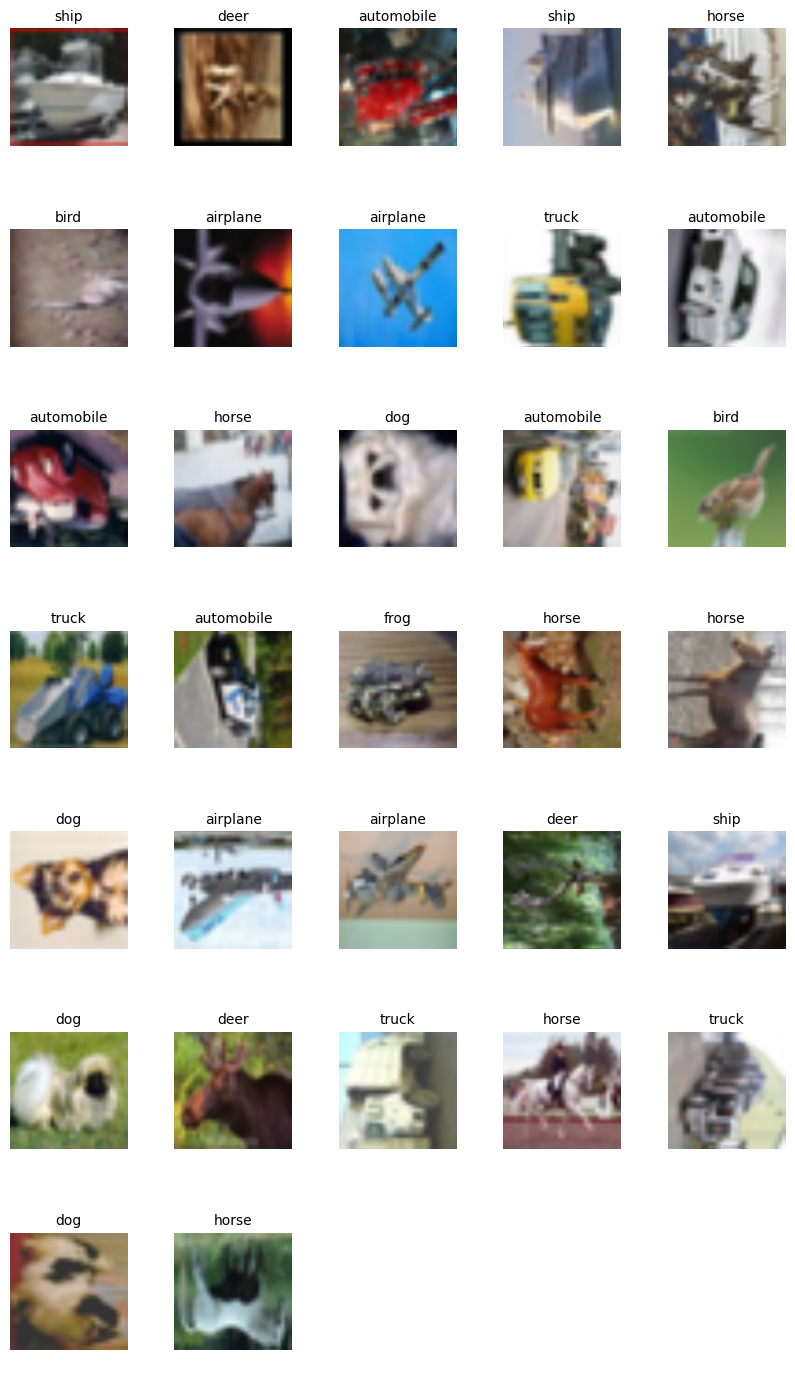

In [19]:
# 创建 ImageGenerator 类
import numpy as np
from skimage.transform import resize
import json
import os
import matplotlib.pyplot as plt

class ImageGenerator:


    def __init__(self, file_path, label_path, batch_size, image_size, rotation=False, mirroring=False, shuffle=False):
        self.file_path = file_path
        self.label_path = label_path
        self.batch_size = batch_size
        self.image_size = image_size
        self.rotation = rotation
        self.mirroring = mirroring
        self.shuffle = shuffle
        
        # 读取标签
        with open(self.label_path, 'r') as f:
            self.labels = json.load(f)
        
        # 获取所有图片文件名
        self.image_files = [f for f in os.listdir(self.file_path) if f.endswith('.npy')]
        
        # 初始化索引
        self.indices = np.arange(len(self.image_files))
        if self.shuffle:
            np.random.shuffle(self.indices)
        
        self.current_index = 0
        self.epoch = 0
    
    def next(self):
        if self.current_index + self.batch_size > len(self.image_files):
            # 如果当前索引加上批大小超出图片数量，重置索引并重新洗牌
            self.epoch += 1
            self.current_index = 0
            if self.shuffle:
                np.random.shuffle(self.indices)
        
        # 选择下一个批次的图片索引
        batch_indices = self.indices[self.current_index:self.current_index + self.batch_size]
        self.current_index += self.batch_size
       
        # 读取图片和标签
        images = []
        labels = []
        for idx in batch_indices:
            img = np.load(os.path.join(self.file_path, self.image_files[idx]))
            img = resize(img, self.image_size, preserve_range=True).astype(np.uint8)
            label = self.labels[self.image_files[idx].replace('.npy', '')]
            images.append(img)
            labels.append(label)
        
        # 应用数据增强
        images = np.array(images)
        if self.mirroring:
            # 随机镜像
            for i in range(len(images)):
                if np.random.rand() > 0.5:
                    images[i] = np.fliplr(images[i])
        if self.rotation:
            # 随机旋转
            for i in range(len(images)):
                rotations = np.random.choice([0, 1, 2, 3])
                images[i] = np.rot90(images[i], rotations)
        
        return images, np.array(labels)
    
    def current_epoch(self):
        return self.epoch
    
    def class_name(self, label):
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        return class_names[label]

    def show(self):
        images, labels = self.next()
        # 假设我们要在一行显示5个图像，可以根据图像数量计算需要多少行
        num_images = len(images)
        num_columns = 5
        num_rows = (num_images + num_columns - 1) // num_columns  # 计算所需行数

        fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2.5))  # 调整画布大小
        fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的间距

        for i, (img, label) in enumerate(zip(images, labels)):
            ax = axes[i // num_columns, i % num_columns]  # 选择正确的子图
            ax.imshow(img)
            ax.set_title(self.class_name(label), fontsize=10)  # 设置较小的字体大小
            ax.axis('off')

        # 隐藏多余的子图
        for j in range(i + 1, num_rows * num_columns):
            axes[j // num_columns, j % num_columns].axis('off')

        plt.show()


# 下面的函数调用是注释的，等待最终用户确认代码无误后再执行。
# 创建 ImageGenerator 实例
generator = ImageGenerator(
    file_path='D:\studieren\Deep Learning\Übung\exercise0_material\src_to_implement\data\exercise_data', 
    label_path='D:\studieren\Deep Learning\Übung\exercise0_material\src_to_implement\data\Labels.json', 
    batch_size=32, 
    image_size=[224, 224, 3], 
    rotation=True, 
    mirroring=True, 
    shuffle=True
)

# 显示一批图像以验证
generator.show()



In [ ]:
    
    # def show(self):
    #     images, labels = self.next()
    #     fig, axes = plt.subplots(1, len(images), figsize=(10, 2))
    #     for i, (img, label) in enumerate(zip(images, labels)):
    #         ax = axes[i]
    #         ax.imshow(img)
    #         ax.set_title(self.class_name(label))
    #         ax.axis('off')
    #     #plt.tight_layout()
    #     #plt.subplots_adjust(wspace=0.1)  # 增加子图之间的宽度间隙
    #     plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5, hspace=0.2)

    #     #plt.show()